In [1]:
# Repository locations
ATM_DIR = "/epyc/projects/atm/atm/"
ATM_DATA_DIR = "/epyc/projects/atm/atm_data/"

In [2]:
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8, 
        context="paper", 
        style="ticks", 
        rc={"axes.linewidth": 0.8})
sns.set_palette("viridis")

%matplotlib inline

import sys
sys.path.append(ATM_DIR)

from atm.obs import WISE
from atm.models import NEATM
from atm.functions import calcQ
from atm.functions import calcFluxLambdaAtObsWithSunlight
from atm.analysis import calcColors
from atm.analysis import mergeResultsWithNEOWISE
from atm.plotting import plotHist

In [3]:
DPI = 300
SAVE_DIR = "../plots/"
FORMAT = "png"

SAVE_FIGS = True

In [4]:
RUN_DIR = os.path.join(ATM_DATA_DIR, "paper1/runs")
RUN_NAME = "run1"

In [5]:
results_database = os.path.join(RUN_DIR, "atm_results_{}.db".format(RUN_NAME))
merged_results, pp_dfs = mergeResultsWithNEOWISE(os.path.join(ATM_DATA_DIR, "paper1/sample.db"), 
                                                 results_database, 
                                                 neowiseTable="neowise_v2",
                                                 minObs=3, 
                                                 fitCodes=["DVBI"])

There are 181589 fits for 141484 unique objects in the 2016 NEOWISE PDS table.
Selecting only fits with at least 3 observations in each band.
Selecting only fits with fit code(s): DVBI.
There are 3650 fits for 3388 unique objects.
3607 fits have been matched with an object in observations.
Sorting by number of observations and keeping the fits using the most observations...
3347 fits have been found for 3347 unique objects in observations.

Merging NEOWISE results with post-processed tables...
Done.



Filtered results: 3334


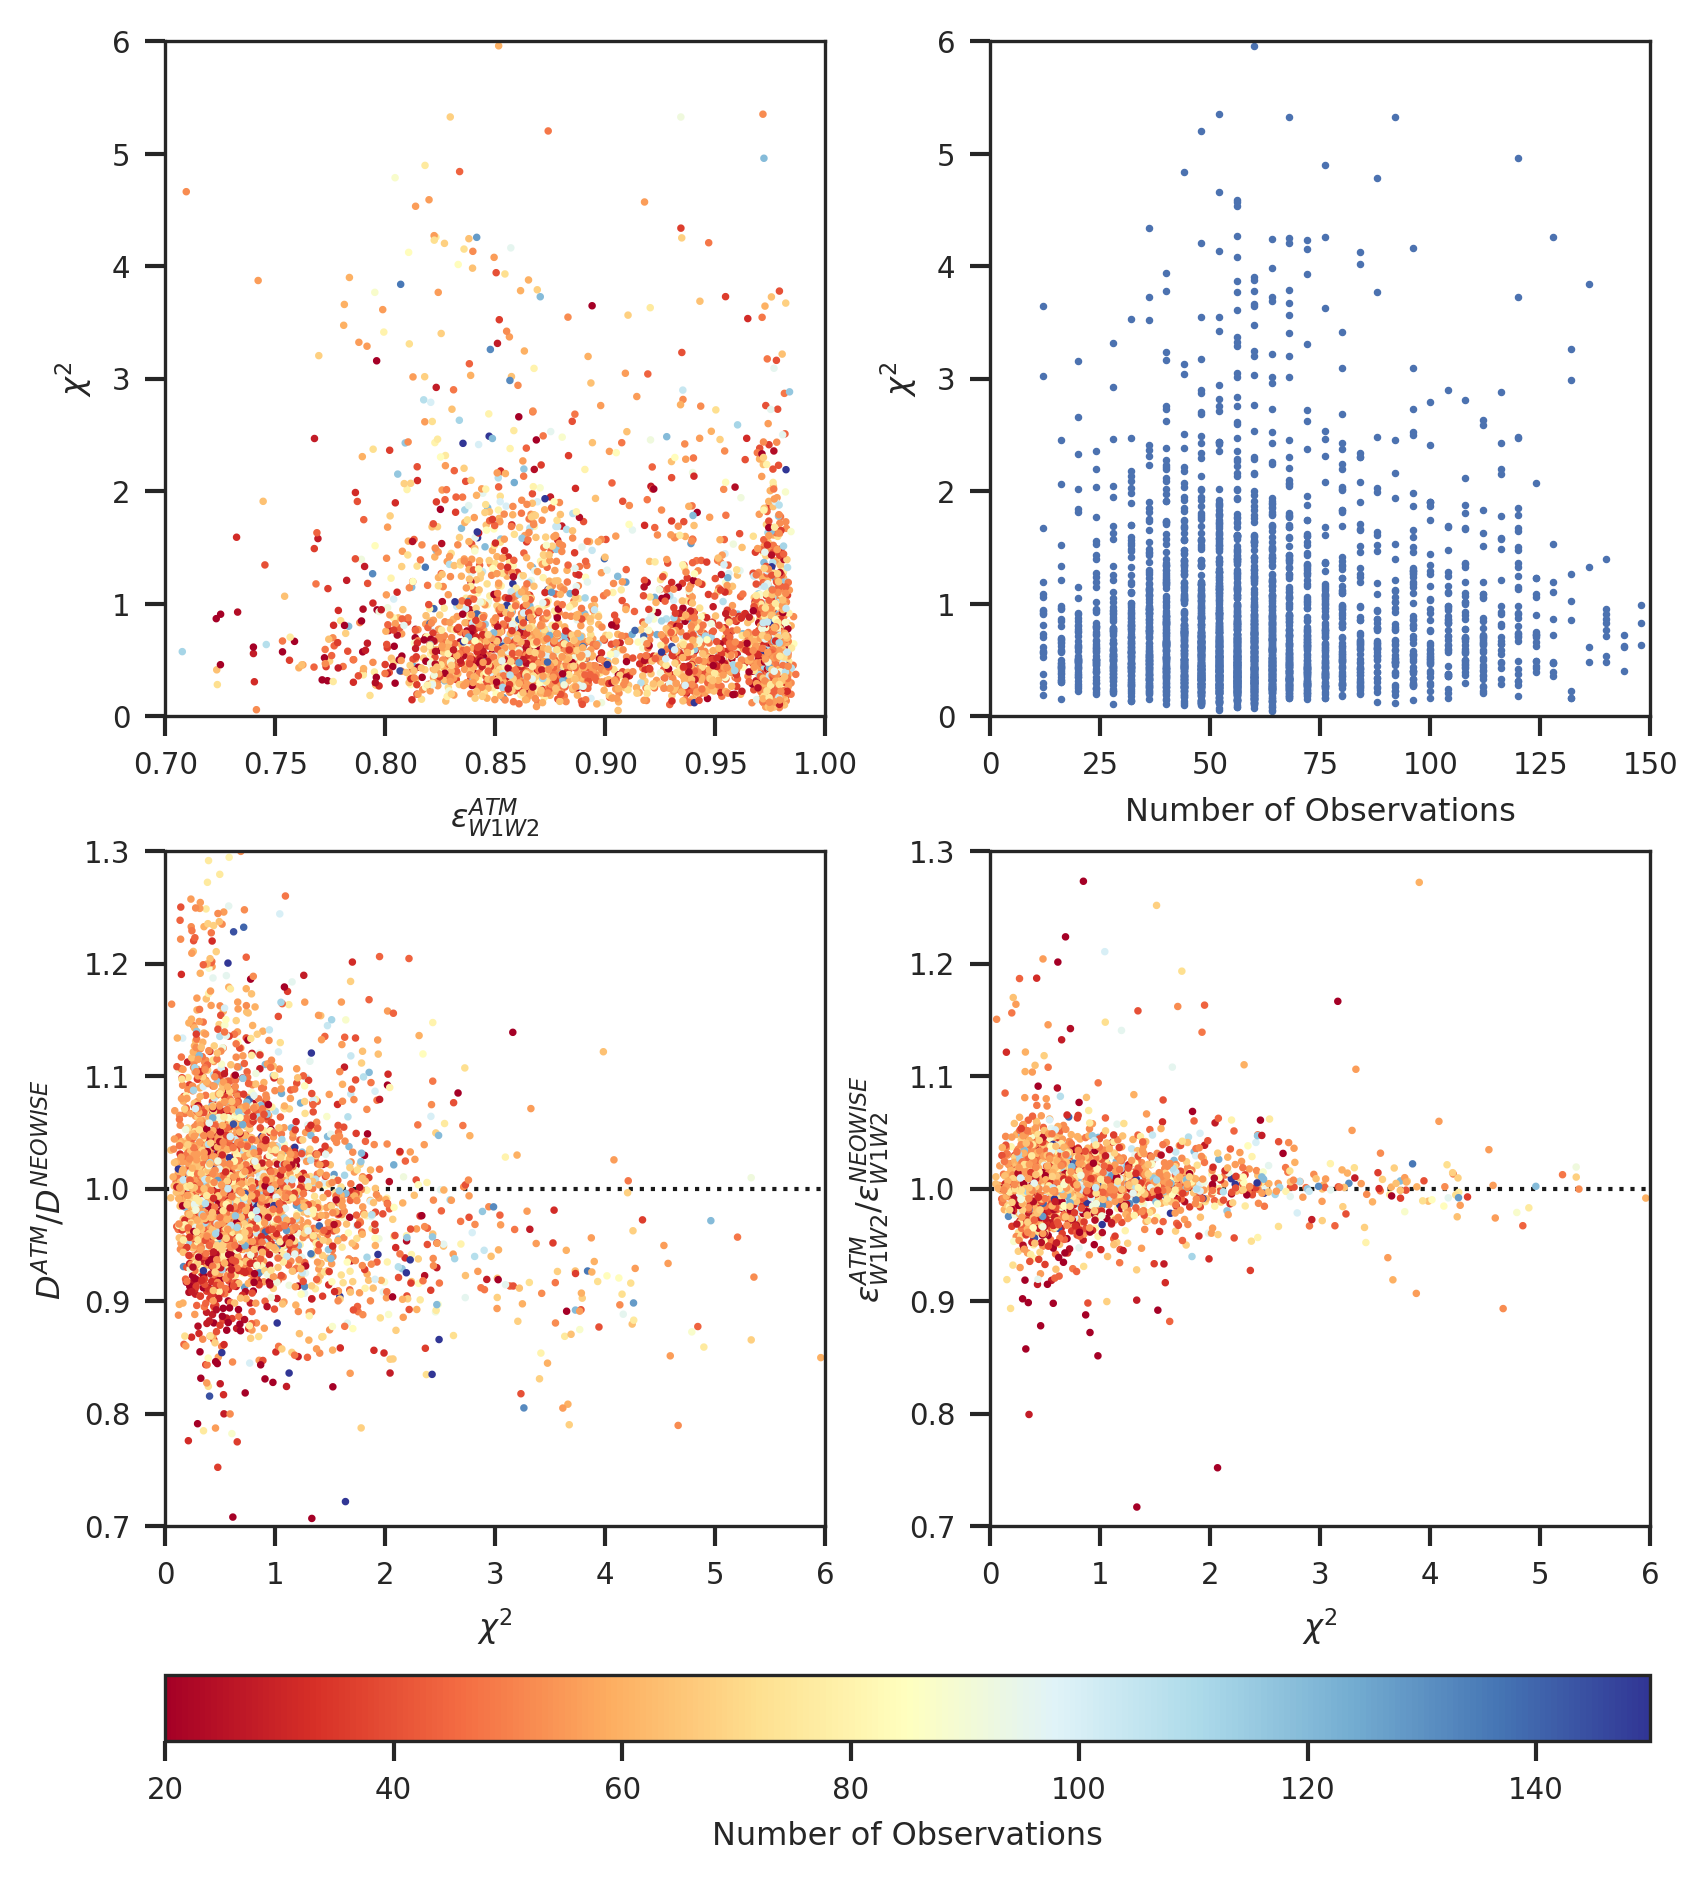

In [6]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])

filtered_results = merged_results
print("Filtered results: {}".format(len(filtered_results)))

scatterKwargs = {
    "cmap" : "RdYlBu",
    "vmin" : 20,
    "vmax" : 150,
    "s": 1,
    "c": filtered_results["num_obs"].values
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
cm = ax[0,0].scatter(filtered_results["eps_W1W2_median"].values, 
                     filtered_results["reduced_chi2"].values,
                     **scatterKwargs)
ax[0,0].set_xlabel("$\epsilon_{W1W2}^{ATM}$")
ax[0,0].set_ylabel("$\chi^2$")
ax[0,0].set_ylim(0, 6)
ax[0,0].set_xlim(0.70, 1.0)

cm = ax[0,1].scatter(filtered_results["num_obs"].values, 
                     filtered_results["reduced_chi2"].values,
                     s=1,
                     c="b")
ax[0,1].set_xlabel("Number of Observations")
ax[0,1].set_ylabel("$\chi^2$")
ax[0,1].set_xlim(0, 150)
ax[0,1].set_ylim(0, 6)

cm = ax[1,0].scatter(filtered_results["reduced_chi2"].values, 
                     10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                     **scatterKwargs)
ax[1,0].hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax[1,0].set_xlabel("$\chi^2$")
ax[1,0].set_ylabel("$D^{ATM}/D^{NEOWISE}$")
ax[1,0].set_xlim(0, 6)
ax[1,0].set_ylim(0.7, 1.3)

cm = ax[1,1].scatter(filtered_results["reduced_chi2"].values, 
                     filtered_results["eps_W1W2_median"].values / (filtered_results["eps_W1W2_NEOWISE"].values), 
                     **scatterKwargs)
ax[1,1].hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax[1,1].set_xlabel("$\chi^2$")
ax[1,1].set_ylabel("$\epsilon_{W1W2}^{ATM}/\epsilon_{W1W2}^{NEOWISE}$")
ax[1,1].set_xlim(0, 6)
ax[1,1].set_ylim(0.7, 1.3)

cbar_ax = fig.add_axes([0.05, -0.08, 0.90, 0.04])
fig.colorbar(cm, 
             cax=cbar_ax, 
             label=r"Number of Observations", 
             orientation="horizontal")
if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "chi2_num_obs_neowise2019.{}".format(FORMAT)),
            bbox_inches='tight')

Filtered results: 3072
3 values are outside the defined minimum and maximum.
17 values are outside the defined minimum and maximum.
19 values are outside the defined minimum and maximum.


/epyc/projects/atm/atm/atm/plotting/histograms.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/atm/atm/plotting/histograms.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(xValues, bins=np.linspace(xRange[0], xRange[1], bins), **histKwargs)
/epyc/projects/atm/envs/atm_py36/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, t

mu : 0.852
sigma : 0.020
weight : 0.187

mu : 0.977
sigma : 0.004
weight : 0.274

mu : 0.893
sigma : 0.050
weight : 0.538

31 values are outside the defined minimum and maximum.
mu : 0.145
sigma : 0.038
weight : 0.192

mu : 0.061
sigma : 0.010
weight : 0.283

mu : 0.365
sigma : 0.081
weight : 0.526



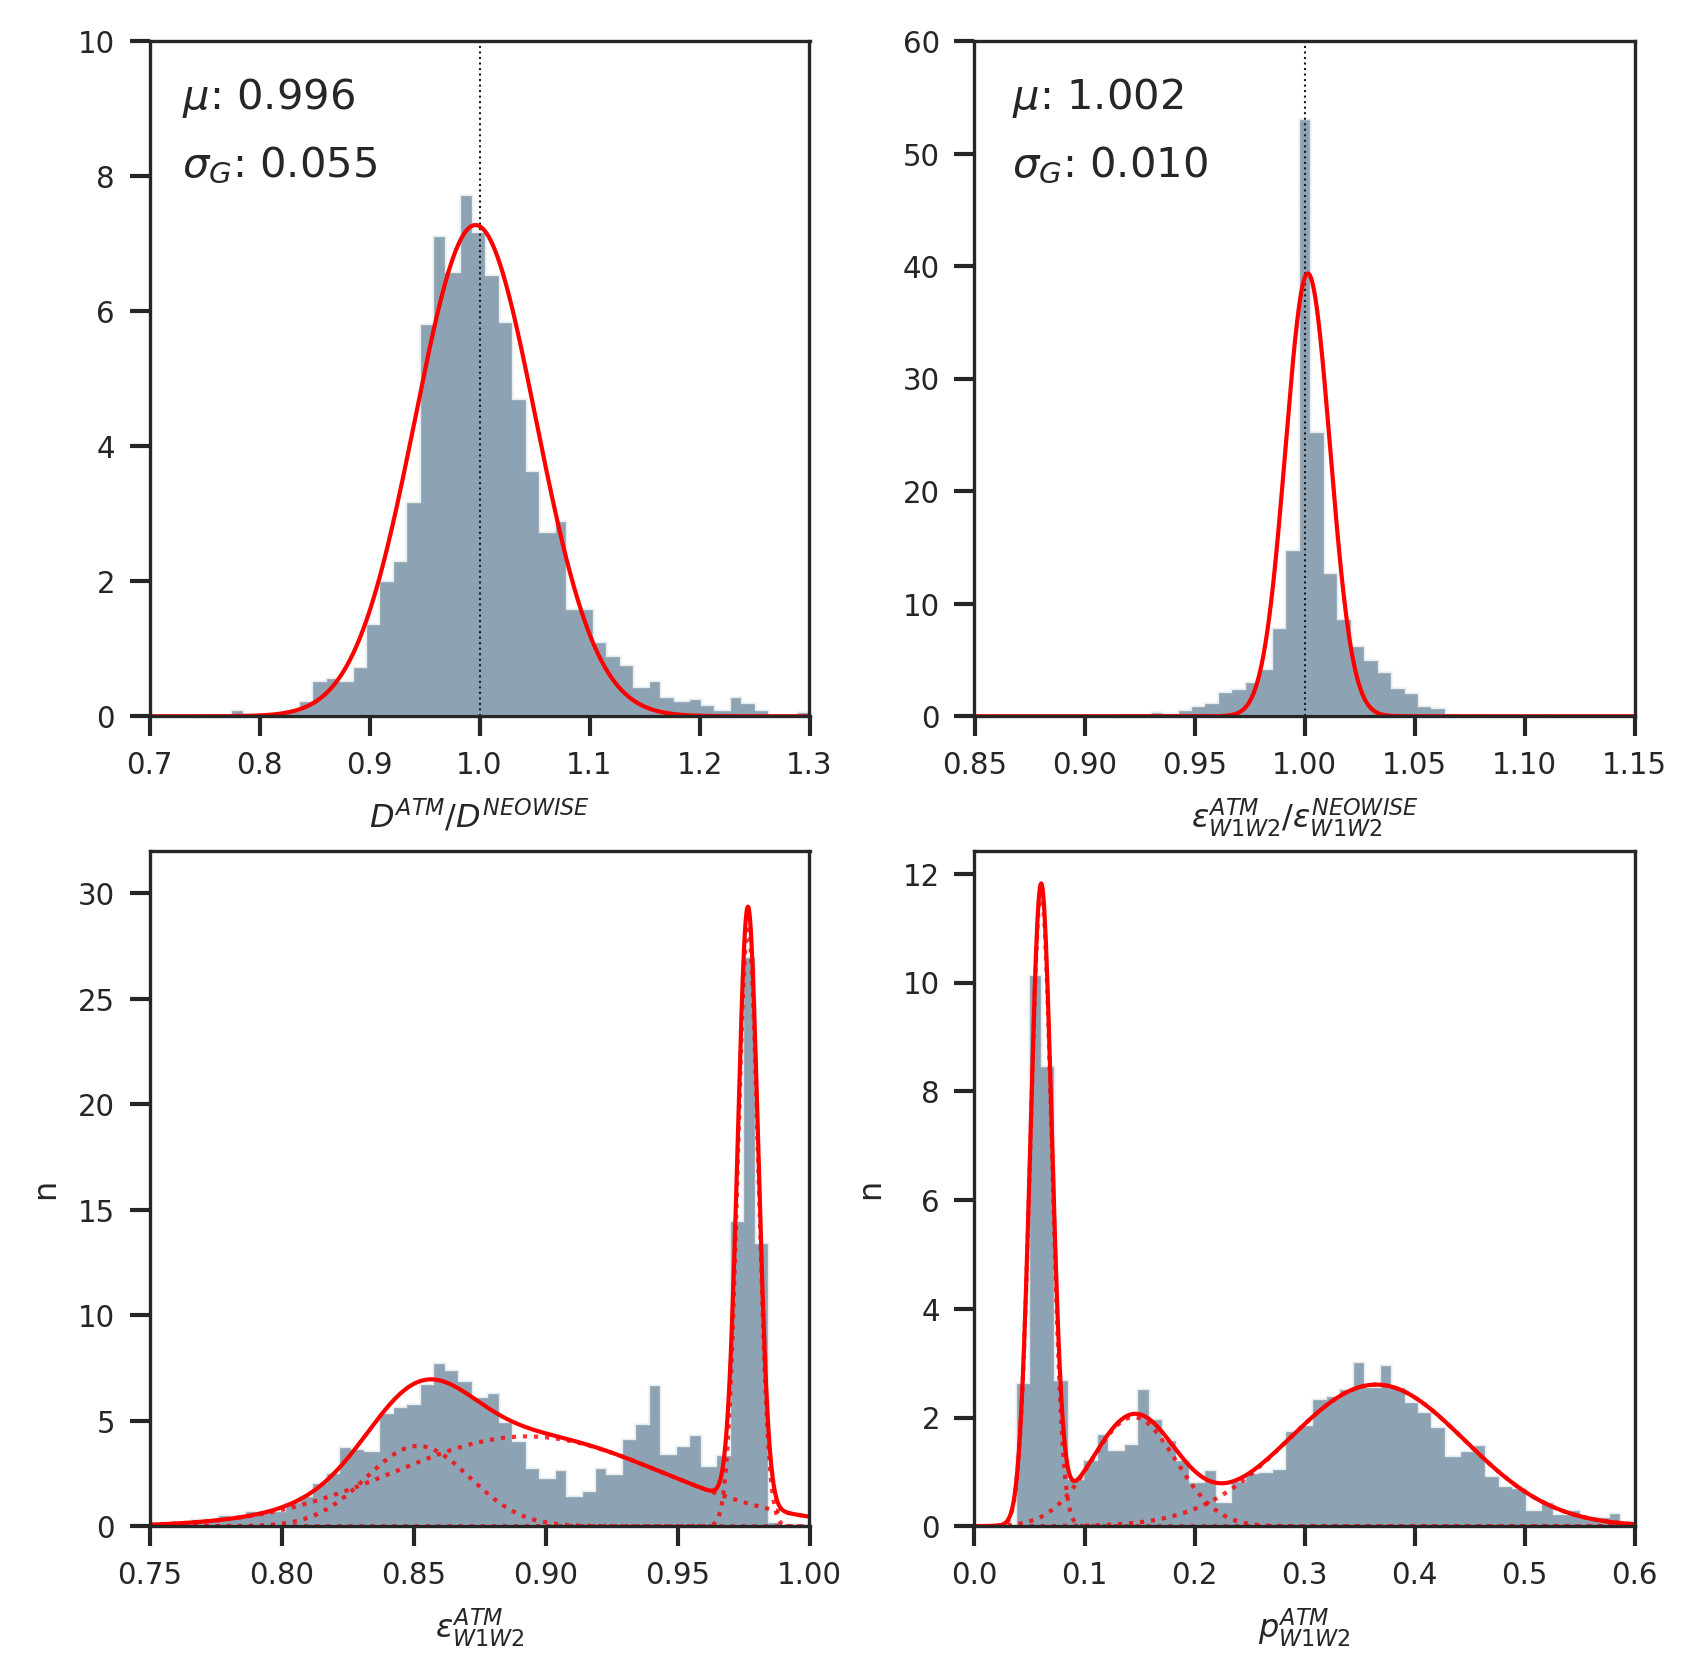

In [7]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])
merged_results["p_W1W2_median"] = (1 - merged_results["eps_W1W2_median"]) / calcQ(merged_results["G_median"])

filtered_results = merged_results[(merged_results["num_obs"] >= 28)
                                  & (merged_results["reduced_chi2"] < 3)]
print("Filtered results: {}".format(len(filtered_results)))

histKwargs = {
    "histtype" : "stepfilled",
    "color" : "#718CA1",
    "alpha" : 0.8, 
    "normed" : True,
}
plotKwargs = {
    "ls" : "-",
    "lw" : 1,
    "c" : "red"
}

plotKwargsComponents = {
    "ls" : ":",
    "lw" : 1,
    "c" : "red",
    "alpha" : 0.8
}

verticalLines = {
    "lw" : 0.5,
    "linestyle" : ":",
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
ax[0,0], stats = plotHist(ax[0,0], 
                         10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                         [0.7, 1.3], 
                         numGauss=1, 
                         bins=50,
                         histKwargs=histKwargs,
                         plotKwargs=plotKwargs)
ax[0,0].vlines([1.0], 0, 10, **verticalLines)
ax[0,0].set_xlabel(r"$D^{ATM} / D^{NEOWISE}$")
ax[0,0].set_xlim(0.7, 1.3)
ax[0,0].set_ylim(0, 10)
ax[0,0].text(0.73, 9.0, r"$\mu$: {:.3f}".format(stats[0]))
ax[0,0].text(0.73, 8.0, r"$\sigma_G$: {:.3f}".format(stats[1]))


ax[0,1], stats = plotHist(ax[0,1], 
                         filtered_results["eps_W1W2_median"].values / filtered_results["eps_W1W2_NEOWISE"].values, 
                         [0.85, 1.15], 
                         numGauss=1, 
                         bins=50,
                         histKwargs=histKwargs,
                         plotKwargs=plotKwargs)
ax[0,1].vlines([1.0], 0, 60, **verticalLines)
ax[0,1].set_xlabel(r"$\epsilon^{ATM}_{W1W2} / \epsilon^{NEOWISE}_{W1W2}$")
ax[0,1].set_xlim(0.85, 1.15)
ax[0,1].set_ylim(0, 60)
ax[0,1].text(0.867, 54, r"$\mu$: {:.3f}".format(stats[0]))
ax[0,1].text(0.867, 48, r"$\sigma_G$: {:.3f}".format(stats[1]))

ax[1,0], stats = plotHist(ax[1,0], 
                          filtered_results["eps_W1W2_median"].values, 
                          [0.75, 1], 
                          numGauss=3, 
                          bins=50,
                          histKwargs=histKwargs,
                          plotKwargs=plotKwargs,
                          plotKwargsComponents=plotKwargsComponents)
ax[1,0].set_xlabel("$\epsilon^{ATM}_{W1W2}$")
ax[1,0].set_ylabel("n")
ax[1,0].set_ylim(0, 32)
ax[1,0].set_xlim(0.75, 1.0)
for gauss in stats:
    print("mu : {:.3f}".format(gauss[0]))
    print("sigma : {:.3f}".format(gauss[1]))
    print("weight : {:.3f}".format(gauss[2]))
    print("")
    
ax[1,1], stats = plotHist(ax[1,1], 
                          filtered_results["p_W1W2_median"].values, 
                          [0, 0.6], 
                          numGauss=3,
                          bins=50,
                          histKwargs=histKwargs,
                          plotKwargs=plotKwargs,
                          plotKwargsComponents=plotKwargsComponents)
ax[1,1].set_xlabel("$p^{ATM}_{W1W2}$")
ax[1,1].set_ylabel("n")#
ax[1,1].set_xlim(0.0, 0.6)
for gauss in stats:
    print("mu : {:.3f}".format(gauss[0]))
    print("sigma : {:.3f}".format(gauss[1]))
    print("weight : {:.3f}".format(gauss[2]))
    print("")

if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "diameter_emissivity_albedo_neowise2019.{}".format(FORMAT)),
                bbox_inches='tight')